In [1]:
%matplotlib inline

#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import colors

sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

## I. Read Files and Create Dataframes

In [2]:
# read the data from the excel files
# the movies file was found to have two movies that did not have unique movieid's
#  the ratings file was checked to see if these "extra" movieId's were included and they were
# therefore, it was assumed that the movieId's for these two ratings were entered incorrectly
# and both files were updated to reflect a unique movieId for the associated ratings
ratings = pd.read_table('ml-latest-small/ratings_updated.csv', sep=',')
movies = pd.read_table('ml-latest-small/movies_updated.csv',sep=',')
tags = pd.read_table('ml-latest-small/tags.csv',sep=',')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# explore the ratings dataframe
ratings.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

In [5]:
ratings.isnull().values.any()

False

In [6]:
ratings.movieId.nunique()

9064

In [7]:
# explore the movies dataframe
movies.count()

movieId    9123
title      9123
genres     9123
dtype: int64

In [8]:
movies.isnull().values.any()

False

In [9]:
movies.movieId.nunique()

9123

In [10]:
movies.title.nunique()

9123

In [11]:
# add movie title data to ratings data
# join the dataframes on column 'movieId'
df = pd.merge(ratings, movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Check to make sure the resultant database is what is expected and desired.

In [12]:
df.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
title        100004
genres       100004
dtype: int64

In [13]:
df.title.nunique()

9064

In [14]:
df.movieId.nunique()

9064

In [15]:
df.userId.nunique()

671

In [16]:
df.isnull().values.any()

False

Will use df for analyzing ratings.  Now create a dataframe with the unrated movies and the tags information.

In [106]:
# rename the timestamp columns so they have unique names
ratings.rename(columns={'timestamp': 'timestamp_ratings'}, inplace=True)
tags.rename(columns={'timestamp': 'timestamp_tags'}, inplace=True)

In [107]:
# merge the three files, tags, movies, and ratings
tags_movieIds = pd.merge(pd.merge(tags, movies, on='movieId', how='left'),ratings, on=['userId', 'movieId'], how= 'left')

In [108]:
tags_movieIds.head()

,userId,movieId,tag,timestamp_tags,title,genres,rating,timestamp_ratings
0,15,339,sandra 'boring' bullock,1138537770,While You Were Sleeping (1995),Comedy|Romance,2.5,1.122577e+09
1,15,1955,dentist,1193435061,Kramer vs. Kramer (1979),Drama,4.5,1.338698e+09
2,15,7478,Cambodia,1170560997,Swimming to Cambodia (1987),Drama,NaN,NaN
3,15,32892,Russian,1170626366,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War,NaN,NaN
4,15,34162,forgettable,1141391765,Wedding Crashers (2005),Comedy|Romance,1.0,1.141392e+09


## II. Analyze Data and Create Plots

### What are the number of ratings per each rating value?

In [19]:
# find the number of ratings per each rating value
df.rating.value_counts().sort_index()

0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: rating, dtype: int64

In [20]:
# store it in numratings and then plot
num_ratings = df.rating.value_counts().sort_index()

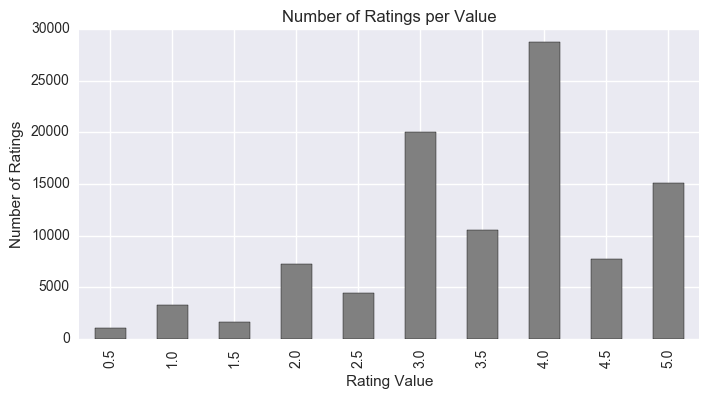

In [21]:
#  create a bar graph of the result
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')
num_ratings.plot(kind='bar', color='grey')
plt.title('Number of Ratings per Value')
plt.savefig('num_ratings_per_value.png')
plt.show()


The most frequent rating given was 4.0, followed by 3.0.  The least most frequent rating was 0.5.

### What is the number of movies rated by each user?

In [22]:
# find the number of  movies rated by each user
df.groupby('userId').size()

userId
1        20
2        76
3        51
4       204
5       100
6        44
7        88
8       116
9        45
10       46
11       38
12       61
13       53
14       20
15     1700
16       29
17      363
18       51
19      423
20       98
21      162
22      220
23      726
24       21
25       26
26      172
27       23
28       50
29       22
30     1011
       ... 
642      36
643      24
644      39
645      30
646     169
647     150
648     256
649      90
650      29
651      20
652     267
653      51
654     626
655     105
656     128
657      20
658      60
659     142
660      92
661      33
662      58
663      26
664     519
665     434
666      40
667      68
668      20
669      37
670      31
671     115
dtype: int64

In [23]:
#  save it so we can plot it
ratingsperuser = df.groupby('userId').size()

In [24]:
#  What is the largest number of movies rated by a user?
ratingsperuser.max()

2391

In [25]:
#  What is the smallest number of movies rated by a user?
ratingsperuser.min()

20

In [26]:
# what is the average number of movies rated by a user?
ratingsperuser.mean()

149.03725782414307

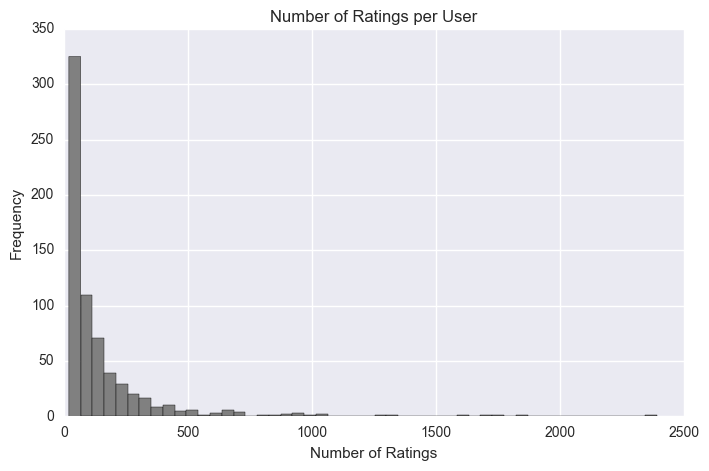

In [27]:
# create a histogram of the number of movies rated by a user

plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
ratingsperuser.plot.hist(bins=50,color='grey')
plt.xlabel('Number of Ratings')
plt.title('Number of Ratings per User')
plt.savefig('num_ratings_per_user')
plt.show()


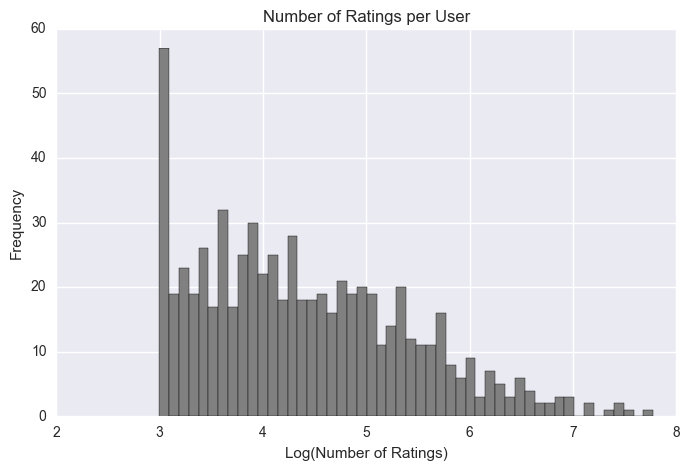

In [29]:
# Let's take the log of "ratingsperuser" and replot
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
np.log(ratingsperuser).plot.hist(bins=50,color='grey')
plt.xlabel('Log(Number of Ratings)')
plt.title('Number of Ratings per User')
plt.savefig('log_num_ratings_per_user')
plt.show()

### What is the average rating assigned by each user?

In [30]:
# what is the average rating assigned by a user?
user_df = df[['userId','rating']].groupby('userId').mean()

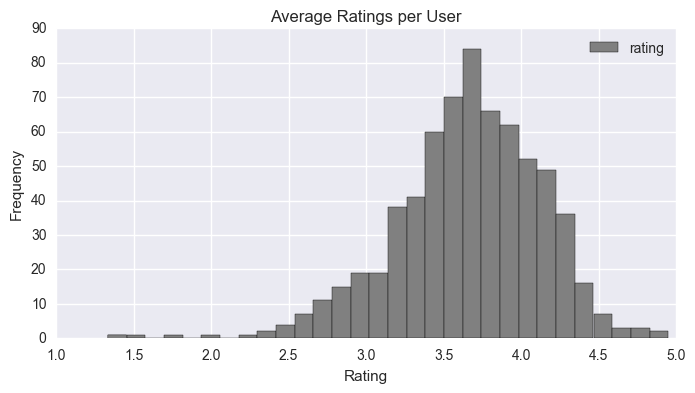

In [31]:
# create a histogram of the average rating assigned by a user and see if it is a normal distribution
plt.figure()
#ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
user_df.plot.hist(bins=30,color='grey')
plt.xlabel('Rating')
plt.title('Average Ratings per User')
plt.savefig('avg_ratings_per_user')
plt.show()


The most frequent average rating was between 3.5 and 4.0.

### What is the number of ratings each movie received? 

In [32]:
# we want to know what the average rating of each movie was and how many ratings each movie received
# create a dataframe called mdf that contains the movieId and rating
movie_df = df[['movieId','rating']]

In [33]:
ratings_per_movie = movie_df.groupby('movieId').size()

In [34]:
ratings_per_movie.head()

movieId
1    247
2    107
3     59
4     13
5     56
dtype: int64

In [35]:
ratings_per_movie.min()

1

In [36]:
ratings_per_movie.max()

341

In [37]:
ratings_per_movie.mean()

11.033097969991173

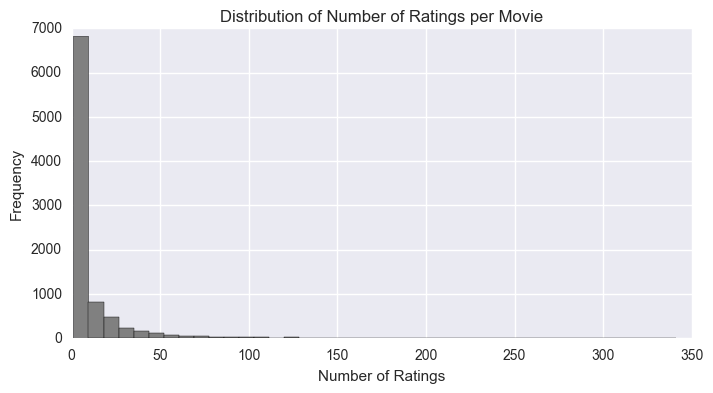

In [40]:
# create a histogram of the number of ratings per movie

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ratings_per_movie.plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.savefig('num_ratings_per_movie')
plt.show()

Most of the movies have less than 50 ratings.

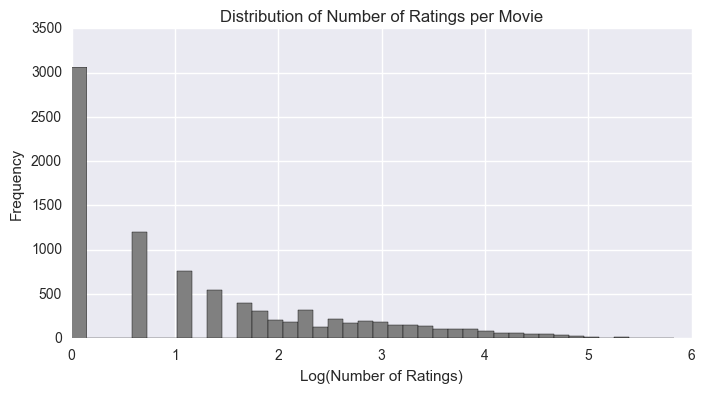

In [41]:
# Let's take the log of the ratings_per_movie and replot
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
np.log(ratings_per_movie).plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Log(Number of Ratings)')
plt.savefig('log_num_ratings_per_movie')
plt.show()

There are more movies with fewer ratings than movies with lots of ratings.

### How many ratings of each value did each movie receive?

In [42]:
# how many ratings of each value did each movie receive?
df.groupby(['movieId','rating']).size()

movieId  rating
1        1.0        4
         1.5        3
         2.0       13
         2.5        4
         3.0       41
         3.5       23
         4.0       77
         4.5       19
         5.0       63
2        1.5        1
         2.0       12
         2.5        6
         3.0       37
         3.5       10
         4.0       27
         4.5        1
         5.0       13
3        0.5        1
         1.0        3
         1.5        2
         2.0        9
         2.5        2
         3.0       18
         3.5        2
         4.0       13
         4.5        2
         5.0        7
4        1.0        3
         1.5        1
         2.0        1
                   ..
159093   1.0        1
         3.0        1
159462   3.0        1
159690   2.0        1
159755   1.0        1
159858   3.5        1
         4.0        1
159972   0.5        1
160080   1.0        1
160271   2.5        1
160438   4.0        1
         4.5        1
160440   1.5        1
160563   1.0    

In [43]:
num_ratings_per_value_each_movie = df.groupby(['movieId','rating']).size()
num_ratings_per_value_each_movie.min()

1

In [44]:
num_ratings_per_value_each_movie.max()

170

In [45]:
num_ratings_per_value_each_movie.mean()

3.4877410804589686

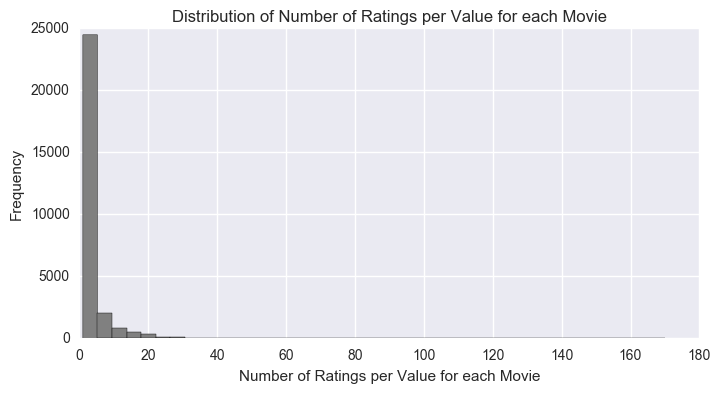

In [47]:
# create a histogram of the number of ratings per movie

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
num_ratings_per_value_each_movie.plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Ratings per Value for each Movie')
plt.xlabel('Number of Ratings per Value for each Movie')
plt.savefig('num_ratings_per_value_per_movie')
plt.show()

Most movies have fewer than 40 ratings for any particular rating value.

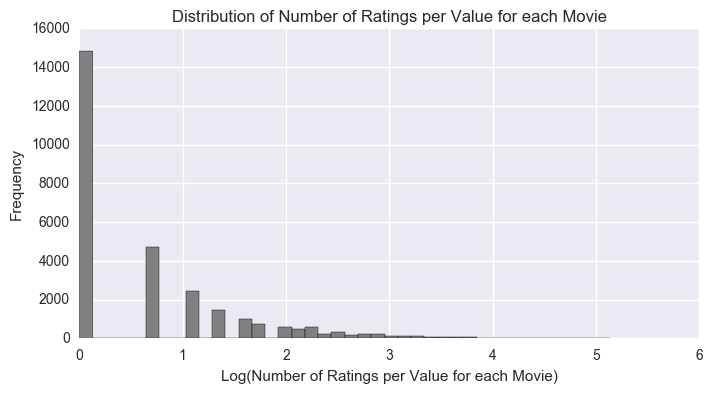

In [48]:
# let's take the log and replot
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
np.log(num_ratings_per_value_each_movie).plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Ratings per Value for each Movie')
plt.xlabel('Log(Number of Ratings per Value for each Movie)')
plt.savefig('log_num_ratings_per_value_per_movie')
plt.show()

### What was the average rating each movie received?

In [49]:
# what was the average rating each movie received?
movie_df.groupby('movieId').mean()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
6,3.884615
7,3.283019
8,3.800000
9,3.150000


In [50]:
avg_rating_per_movie = movie_df.groupby('movieId').mean()

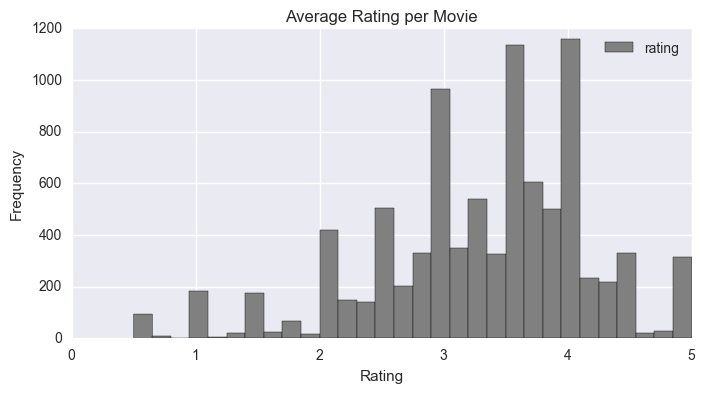

In [51]:
# create a histogram of the average rating per movie

plt.figure()
#ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
avg_rating_per_movie.plot.hist(bins=30,color='grey')
plt.xlabel('Rating')
plt.title('Average Rating per Movie')
plt.savefig('avg_rating_per_movie.png')
plt.show()


This is not a Guassian distribution.  This could be because movie users are movie lovers and tend to be generous when rating their movies.  Or it could mean the users are more likely to rate a movie when they enjoy the movie and less likely to rate a movie when they don't enjoy it.

In [52]:
# which movie received the most ratings of 5.0?
most_fives = df[df.rating == 5.0]

In [53]:
# the top 10 most highly rated films
most_fives.groupby('title').size().sort_values(ascending=False).head(10)

title
Shawshank Redemption, The (1994)                         170
Pulp Fiction (1994)                                      138
Star Wars: Episode IV - A New Hope (1977)                122
Schindler's List (1993)                                  109
Godfather, The (1972)                                    107
Forrest Gump (1994)                                      102
Silence of the Lambs, The (1991)                         100
Fargo (1996)                                             100
Matrix, The (1999)                                        95
Star Wars: Episode V - The Empire Strikes Back (1980)     94
dtype: int64

"The Shawshank Redemption (1994)" received the most 5.0 ratings.

### Which movies received the most ratings of 2.0 or lower?

In [56]:
# which movie received the most ratings of 2.0 or lower?
most_low_ratings = df[(df.rating == 0.5)|(df.rating == 1.0)|(df.rating == 1.5)|(df.rating == 2.0)]

In [57]:
# the bottom 10 movies
most_low_ratings.groupby('title').size().sort_values(ascending=False).head(10)

title
Ace Ventura: Pet Detective (1994)         54
Batman Forever (1995)                     42
Titanic (1997)                            36
Waterworld (1995)                         36
Blair Witch Project, The (1999)           35
Ace Ventura: When Nature Calls (1995)     35
Independence Day (a.k.a. ID4) (1996)      34
Dumb & Dumber (Dumb and Dumber) (1994)    33
Mask, The (1994)                          31
Congo (1995)                              31
dtype: int64

The movie with the most low ratings was "Ace Ventura:  Pet Detective (1994)"

In [62]:
# I see a movie on the list that I like. I am just curious to see how it was rated overall.
df[df.title == "Titanic (1997)"].groupby('rating').size()

rating
0.5     5
1.0     8
1.5     4
2.0    19
2.5    11
3.0    30
3.5    11
4.0    38
4.5    12
5.0    26
dtype: int64

While Titanic received a lot of negative ratings, it also received 117 ratings of 3.0 or higher.  There may be movies that have more ratings, in general, and therefore would have more lower ratings, but this does not mean that it is not a well liked movie.

### Which genre is the most popular?

In [59]:
# which genre received the most ratings of 4.0 or higher?
genre_highs = df[(df.rating == 4.0) | (df.rating == 4.5) | (df.rating == 5.0)]

In [60]:
genre_highs.groupby('genres').size().sort_values(ascending=False).head(10)

genres
Drama                      4572
Comedy                     2822
Drama|Romance              2021
Comedy|Drama               1816
Comedy|Drama|Romance       1732
Comedy|Romance             1699
Crime|Drama                1674
Action|Adventure|Sci-Fi    1139
Drama|War                   841
Documentary                 765
dtype: int64

Drama is the most popular genre.

## Analyze Unrated Movies and Tags

In [109]:
tags_movieIds.head()

,userId,movieId,tag,timestamp_tags,title,genres,rating,timestamp_ratings
0,15,339,sandra 'boring' bullock,1138537770,While You Were Sleeping (1995),Comedy|Romance,2.5,1.122577e+09
1,15,1955,dentist,1193435061,Kramer vs. Kramer (1979),Drama,4.5,1.338698e+09
2,15,7478,Cambodia,1170560997,Swimming to Cambodia (1987),Drama,NaN,NaN
3,15,32892,Russian,1170626366,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War,NaN,NaN
4,15,34162,forgettable,1141391765,Wedding Crashers (2005),Comedy|Romance,1.0,1.141392e+09


In [162]:
tags_movieIds.tag.nunique()

582

There are 582 unique tags.

In [120]:
# How many movies have atleast 1 tag?
tags_movieIds.movieId.nunique()

689

There are 689 movies that have been tagged.

In [140]:
# How many users provided tags?
tags_movieIds.userId.nunique()

61

There are 61 users that have utilized tagging.

In [148]:
# How many movies were tagged but not rated?
tags_movieIds[tags_movieIds.rating.isnull()].movieId.nunique()

266

There were 266 movies that were not rated but were tagged.

In [121]:
# what is the range of dates that the tags occured?
tags_movieIds.timestamp_tags.min()


1137217440

In [122]:
tags_movieIds.timestamp_tags.max()

1476650744

In [149]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
# convert to years
tags_movieIds.timestamp_tags.min()/60/60/24/365.0

36.060273972602737

First tag was submitted on January of 2006

In [150]:
tags_movieIds.timestamp_tags.max()/60/60/24/365.0

46.821917808219176

Last tag was submitted in October 2016.  Tagging took place over a 10 year period.

In [128]:
# what is the total number of tags submitted?
tags_movieIds.tag.count()

1296

There was a total of 1296 tags submitted.

In [158]:
# what is the maximum number of tags a movie received?
tags_movieIds.groupby('movieId').size().max()

25

The maximum number of tags a movie received was 25.

In [176]:
tags_movieIds.groupby('movieId').size().mean()

1.8809869375907111

The average number of tags a movie received was 1.88.

In [159]:
tags_movieIds.groupby('userId').size().max()

401

The maximum number of tags submitted by a user was 401.

In [177]:
tags_movieIds.groupby('userId').size().mean()

21.24590163934426

In [184]:
tags_per_user = tags_movieIds.groupby('userId').size()

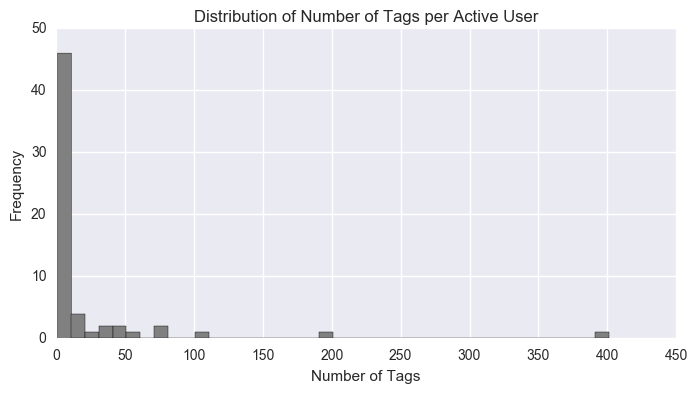

In [185]:
# create a histogram of the number of tags per user

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
tags_per_user.plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Tags per Active User')
plt.xlabel('Number of Tags')
plt.savefig('num_tags_per_user')
plt.show()

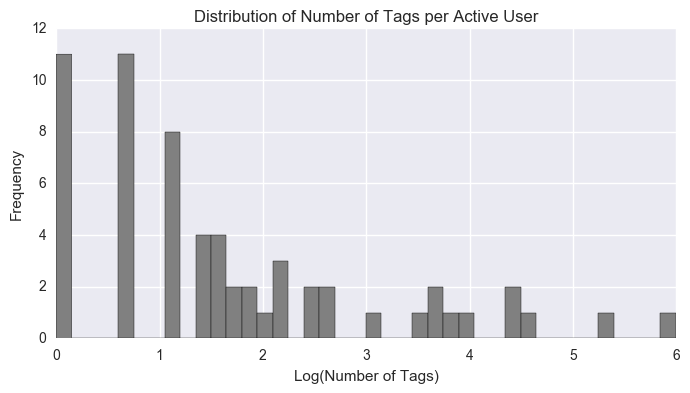

In [186]:
# create a histogram of the number of tags per user

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
np.log(tags_per_user).plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Tags per Active User')
plt.xlabel('Log(Number of Tags)')
plt.savefig('log_num_tags_per_user')
plt.show()

In [181]:
num_tags_per_movie = tags_movieIds.groupby('movieId').size()

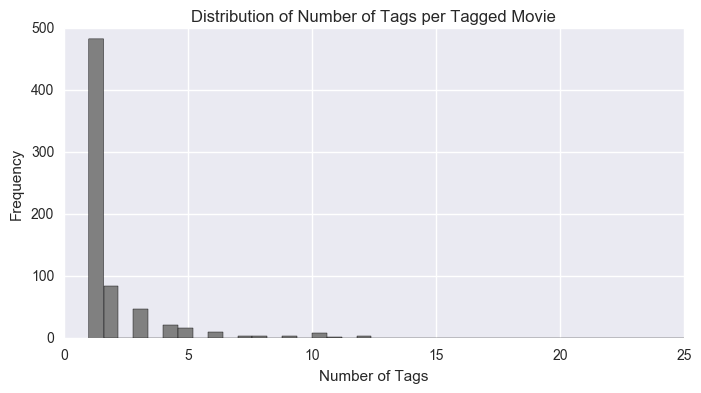

In [182]:
# create a histogram of the number of tags per tagged movie

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
num_tags_per_movie.plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Tags per Tagged Movie')
plt.xlabel('Number of Tags')
plt.savefig('num_tags_per_movie')
plt.show()

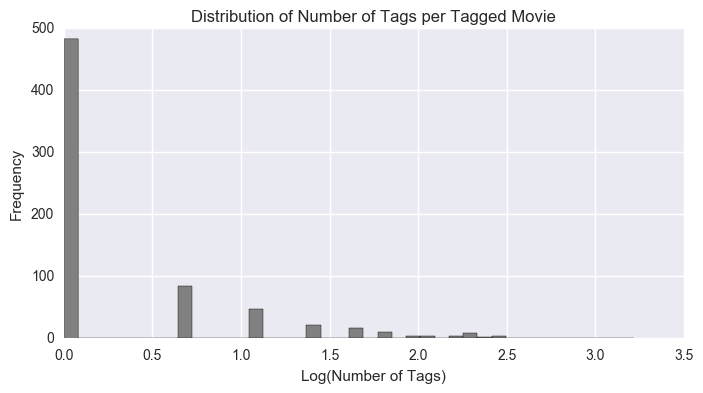

In [183]:
# create a histogram of the number of log(tags per tagged movie)

plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
np.log(num_tags_per_movie).plot.hist(bins=40,color='grey')
plt.title('Distribution of Number of Tags per Tagged Movie')
plt.xlabel('Log(Number of Tags)')
plt.savefig('log_num_tags_per_movie')
plt.show()